In [226]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [228]:
data = pd.read_excel('Y:/BaiduSyncdisk/YAO_2023/Apple/原始数据/apple_area_yield/apple_2022.xlsx')
pro_py = pd.read_csv('./Provinces_Pinyin.csv', index_col=0)
provinces = gpd.read_file('Y:/BaiduSyncdisk/YAO_2023/Apple/原始数据/中国ArcGIS数据(到县界、Lambert投影)/Lambert/province/省级行政区.shp')

In [230]:
pro_py.columns
map_dict = {py.capitalize():name for name,py in zip(pro_py['0'],pro_py['1'])}

In [232]:
data.head()
map_dict.update({'Shaanxi':'陕西','Tianjing':'天津'})
data['NAME'] = data.Province.map(map_dict)

In [234]:
df=pd.merge(provinces, data, on='NAME',how='outer')

In [236]:
df = df.to_crs(epsg=4326)

In [238]:
import cartopy.crs as ccrs
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['font.sans-serif'] = ['Times New Roman']

In [240]:
def formate_labels(p_ax):
    g = p_ax.gridlines(crs= ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, alpha=0.5, linestyle='--')
    g.xlocator = mticker.FixedLocator([75,95,115,135])
    g.ylocator = mticker.FixedLocator([20,30,40,50])
    g.top_labels= False
    g.right_labels = False
    g.xformatter = LONGITUDE_FORMATTER
    g.yformatter = LATITUDE_FORMATTER
    g.xlabel_style = {'size': 8}
    g.ylabel_style = {'size': 8, 'rotation':90}

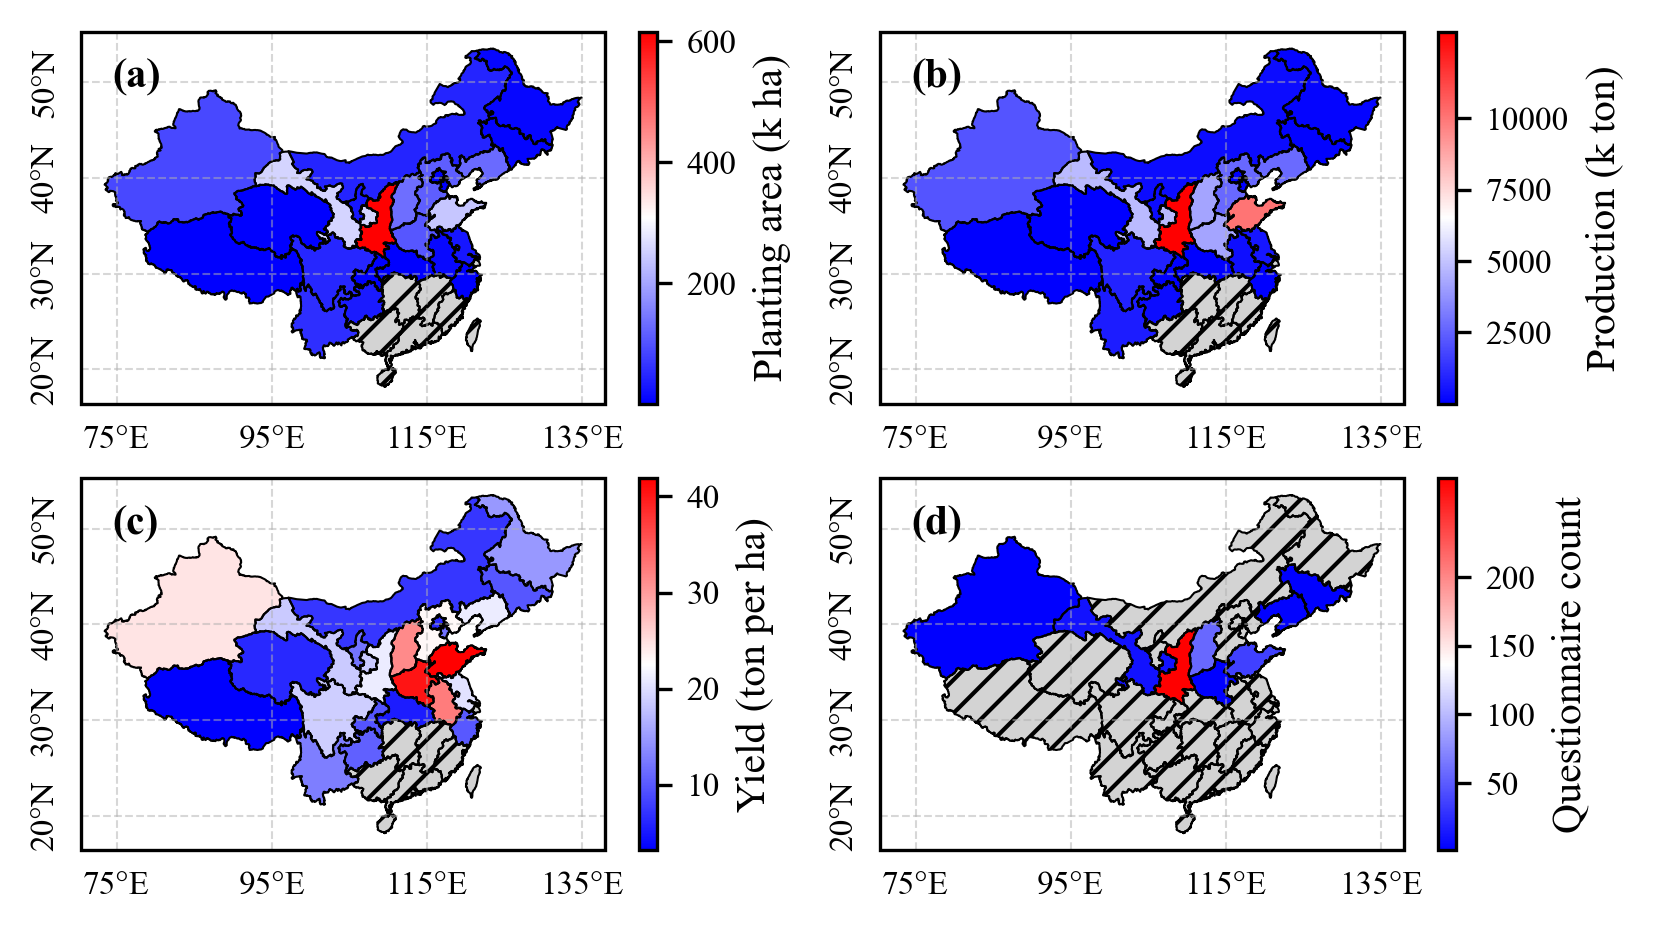

In [246]:
fig,axs = plt.subplots(ncols=2,nrows=2,figsize=(16/2.54, 9/2.54), dpi=300, subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.flatten()
df.plot(column='Planting area (K ha)',ax=axs[0], cmap = 'bwr', legend=True, legend_kwds={"label": "Planting area (k ha)"},
        missing_kwds={"color":"lightgrey","hatch":"///"})
p1 = provinces.to_crs(4326).plot(facecolor='none', edgecolor='k',ax=axs[0],lw=0.5)
p1.annotate('(a)', xy=(0.06, 0.85), xycoords='axes fraction', size=10, fontweight='bold')
formate_labels(p_ax=p1)

df.plot(column='Production (K ton)',ax=axs[1], cmap = 'bwr', legend=True, legend_kwds={"label": "Production (k ton)",'ticks':range(2500,10001,2500)}, 
        missing_kwds={"color":"lightgrey","hatch":"///"})
p2 = provinces.to_crs(4326).plot(facecolor='none', edgecolor='k',ax=axs[1],lw=0.5)
p2.annotate('(b)', xy=(0.06, 0.85), xycoords='axes fraction', size=10, fontweight='bold')
formate_labels(p_ax=p2)


df.plot(column='Yield (ton per ha)',ax=axs[2], cmap = 'bwr', legend=True, legend_kwds={"label": "Yield (ton per ha)"},
        missing_kwds={"color":"lightgrey","hatch":"///"})
p3 = provinces.to_crs(4326).plot(facecolor='none', edgecolor='k',ax=axs[2],lw=0.5)
p3.annotate('(c)', xy=(0.06, 0.85), xycoords='axes fraction', size=10, fontweight='bold')
formate_labels(p3)

df.plot(column='Questionnaire',ax=axs[3],legend=True, cmap = 'bwr',  legend_kwds={"label": "Questionnaire count",'ticks':range(50,201,50)},
        missing_kwds={"color":"lightgrey","hatch":"///"})
p4 = provinces.to_crs(4326).plot(facecolor='none', edgecolor='k',ax=axs[3],lw=0.5)
p4.annotate('(d)', xy=(0.06, 0.85), xycoords='axes fraction', size=10, fontweight='bold')
formate_labels(p4)

plt.savefig("map.jpg", dpi=300, bbox_inches='tight')